In [95]:
from scipy.stats import norm, chi2, t
import numpy as np
import matplotlib.pyplot as plt

# Topic 6

#### Question 6
The wall thickness of $25$ glass $2$-liter bottles was measured by a quality-control engineer. The sample
mean was $\overline{x} = 4.05$ millimeters, and the sample standard deviation was $s = 0.08$ millimeter. Find
a $95\%$ lower confidence bound for mean wall thickness. Interpret the interval you have obtained.

#### Solution

$$\mbox{CI}_{1-\alpha}(\mu) = \left(\bar{x}-z_{\alpha/2}\frac{s}{\sqrt{n}},\infty\right)$$
where $z\sim N(0,1)$

We know the sample mean ($4.05$ ml.), and the standard deviation of theese measurements ($0.08$ ml.)
Since $25$ is a large enough number, we can compute the CI with the formula above (with normal distribution) because of the Central Limit Theorem, instead of having to use the same with a $t$-student distributiuon.

In [96]:
alpha = 0.05 #significance level
mean = 4.05
z = norm.ppf(1 - alpha/2,0,1)

interval = z*(0.08)/5
CI = (round(mean-interval, 2), "∞")
print("("+str(CI[0])+", "+str(CI[1])+")")

(4.02, ∞)


#### Question 8
In a random sample of $85$ automobile engine crankshaft bearings, $10$ have a surface finish that is rougher than the specifications allow. Therefore, a point estimate of the proportion of bearings in the population that exceeds the roughness specification is $\hat{p} = 0.12$.

a) Find a $95\%$ two-sided confidence interval for $p$.
    
b) How large a sample is required if we want to be 95% confident that the error in using to estimate $p$ is less than $0.05$?

#### Solution

##### Part a

$n=85$ is sufficiently large so that we can approximate it with a standard normal after standardization. Then:

$$Z=\frac{X-np}{\sqrt{np(1-p)}}=\frac{\hat{P}-p}{\sqrt{\frac{p(1-p)}{n}}}$$

is standard normal.

Then, to construct the confidence interval on $p$, we have:

$$P(-z_{\alpha/2}\leq Z \leq z_{\alpha/2}) \approx 1- \alpha$$

Then:

$$P\left(-z_{\alpha/2}\leq \frac{\hat{P}-p}{\sqrt{\frac{p(1-p)}{n}}} \leq z_{\alpha/2}\right) \approx 1- \alpha$$

which can be rearranged as:

$$P\left(\hat{P}-z_{\alpha/2}\cdot \sqrt{\frac{p(1-p)}{n}} \leq p \leq \hat{P}+z_{\alpha/2} \cdot \sqrt{\frac{p(1-p)}{n}} \right) \approx 1- \alpha$$

We now have an unknown parameter $p$ in the limits of the confidence interval, but we can replace it with $\hat{P}$, so:

$$P\left(\hat{P}-z_{\alpha/2}\cdot \sqrt{\frac{\hat{P}(1-\hat{P})}{n}} \leq p \leq \hat{P}+z_{\alpha/2} \cdot \sqrt{\frac{\hat{P}(1-\hat{P})}{n}} \right) \approx 1- \alpha$$

which leads to the approximate $100(1-\alpha)\%$ confidence interval on $p$.

In our case, the confidence interval is:

$$\left(\hat{p}-z_{\alpha/2}\cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq p \leq \hat{p}+z_{\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \right)$$

with $\hat{p}=\frac{10}{85}\approx 0.12$

We can now use python to help with the calculations:

In [97]:
confidence_percentage = 0.95
alpha = 1 - confidence_percentage #significance level
p_estimate = 0.12 #point estimate of p
n = 85 #sample size

L = p_estimate - (norm.ppf(confidence_percentage + alpha/2,0,1))*np.sqrt((p_estimate*(1-p_estimate))/n)
H = p_estimate + (norm.ppf(confidence_percentage + alpha/2,0,1))*np.sqrt((p_estimate*(1-p_estimate))/n)

print("The confidence interval is:","("+str(round(L,2))+", "+str(round(H,2))+")")

The confidence interval is: (0.05, 0.19)


##### Part b

$\hat{P}$ is the point estimator of $p$. Then, we can define the error in the estimation as $E=\mid p-\hat{P}\mid$. Because of the previous results, we can be approximately $100\cdot (1-\alpha)\%$ confident that the error will not surpass $z_{\alpha/2}\cdot\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.

We need the error of $p$ to be at most $E=0.05$. Then, the limit case will be: 

$$z_{\alpha/2}\cdot\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}=E=0.05$$

where $\alpha = 0.05$, because we are looking for a $95\%$ confidence interval.

Then, if we solve for $n$:

$$n=\left(\frac{z_{\alpha/2}}{E}\right)^2 \cdot \hat{p} \cdot (1-\hat{p})$$

We can now use python to help with the calculations:

In [98]:
confidence_percentage = 0.95
alpha = 1 - confidence_percentage #significance level
p_estimate = 0.12 #point estimate of p
max_error = 0.05

n = (norm.ppf(confidence_percentage + alpha/2,0,1)/max_error)**2*p_estimate*(1-p_estimate)

print("The sample size should be:",int(round(n,0)))

The sample size should be: 162


# Topic 7

#### Question 4

One way to evaluate the effectiveness of a course instructor is to examine the scores achieved by his or her students in an examination at the end of the course. Obviously, the mean score is of interest. However, the variance also contains useful information - some teachers have a style that works very well with more able students but is unsuccessful with less able or poorly motivated students. A professor sets a standard examination at the end of each semester for all sections of a course. The variance of the scores on this test is typically very close to $300$. A new instructor has a class of thirty students, whose test scores had a sample quasi-variance of $480$. Regarding these students’ test scores as a random sample from a normal population:


(a) At a $5\%$ significance level, test against a two-sided alternative the null hypothesis that the population variance of their scores is $300$.

(b) Based on your answer to $4a$, decide if a $95\%$ confidence interval for the population variance would include the value of $300$.

(c) Calculate the power of the test.

(d) Draw the power function from $4c$ in $R$.

(e) Looking at the graph from $4d$, what is the probability of Type II error for $\sigma^2 = 500$ (roughly)?

#### Solution
##### Part a:

We have to test, at $5\%$ significance level ($\alpha=0.05$), the following:

$$H_0: \sigma^2 = \sigma^2_0$$
$$H_1: \sigma^2 \neq \sigma^2_0$$

where $\sigma^2_0=300$ and the sample is taken from a random variable $X$: Test Scores (normal population).

##### Using Test Statistics:

As we are testing for the population variance and the populaiton is normal, the test statistic is:

$$\frac{(n-1)s^2}{\sigma_0^2}\sim \chi^2_{n-1}$$

where $n=30$ (there are thirty students in the class) and the sample quasi-variance is $s^2=480$

And our rejection region $RR\alpha$ is (two-tail test):

$$\left\{  \chi^2 : \frac{(n-1)s^2}{\sigma_0^2}< \chi^2_{n-1;1-\alpha/2} \right\} \cup \left\{  \chi^2 : \frac{(n-1)s^2}{\sigma_0^2}> \chi^2_{n-1;\alpha/2} \right\}$$

If the test statistic is in the rejection region, the null hypothesis will be rejected. We will fail to reject it otherwise. I order to perform the calculations, we wil use python:


The rejection region is: (-∞, 16.047) ∪ (45.722, ∞)
The test statistic is: 46.4
The test statistic is inside the rejection region: We have rejected Ho


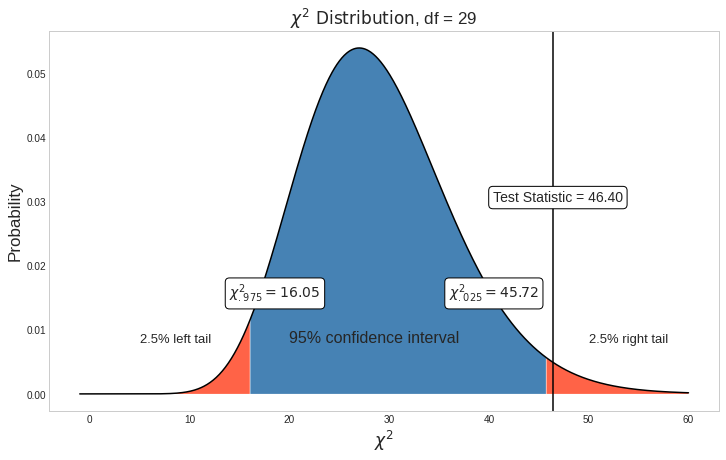

In [99]:
n = 30 #sample size
df = n - 1 #degrees of freedom
s2 = 480 #sample quasi-variance
sigma2_0 = 300 #typical variance
test_stat = ((n-1)*s2)/sigma2_0 #test statistic
alpha = 0.05 #significance level

#calculations:
right_tail = round(chi2.ppf(1 - alpha/2, df),3)
left_tail = round(chi2.ppf(alpha/2, df),3)

print("The rejection region is: (-∞, "+str(left_tail)+") ∪ ("+str(right_tail)+", ∞)")
print("The test statistic is:",test_stat)

if test_stat > right_tail or test_stat < left_tail:
    print("The test statistic is inside the rejection region: We have rejected Ho")
else:
    print("The test statistic is outside the rejection region: We have failed to reject Ho")

#graph:
x = np.linspace(-1, 60, 1000)
y = chi2.pdf(x, df, loc=0, scale=1)

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

plt.axvline(x=test_stat, c='k')

ax.plot(x, y, c='black', label='Degrees of freedom = %d' % df)
ax.set_xlabel('$\chi^2$', fontsize=17)
ax.set_ylabel(r'Probability', fontsize=17)
ax.set_title(r'$\chi^2\ \mathrm{Distribution}$, df = %d' % df, fontsize=17)
ax.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= left_tail), facecolor='tomato')
ax.fill_between(x, 0, y, where=(np.array(x) > left_tail) & (np.array(x) < right_tail), facecolor='steelblue')
ax.fill_between(x, 0, y, where=(np.array(x) > right_tail) & (np.array(x) <= max(x)), facecolor='tomato')
ax.grid(False)

ax.text(50, 0.008, '2.5% right tail', fontsize=13)
ax.text(5, 0.008, '2.5% left tail', fontsize=13)
ax.text(14, 0.015, '$\chi^2_{.975} = %.2f$' % left_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(36, 0.015, '$\chi^2_{.025} = %.2f$' % right_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(test_stat-6, 0.03, 'Test Statistic = %.2f' % test_stat, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(20, 0.008, '95% confidence interval', fontsize=16)

plt.show()


###### Conclusion: 

The sample data has given enough evidence to reject the hypothesis that the population variance is 300

##### Using Confidence Intervals:

The random variable $X$ defined previously follows a normal distribution with parameter $s_X^2=300$ (typical variance). Then, we can define the pivotal quantity for $\sigma_X^2$:

$$\frac{(n-1)s_X^2}{\sigma_X^2}\sim \chi^2_{n-1}$$

Then:

$$P(\chi^2_{n-1;\text{ }\alpha/2} < \chi^2_{n-1} < \chi^2_{n-1;\text{ }\alpha/2})=1-\alpha$$

$$P(\chi^2_{n-1;\text{ }\alpha/2} < \frac{(n-1)s_X^2}{\sigma_X^2} < \chi^2_{n-1;\text{ }\alpha/2})=1-\alpha$$

If we solve the inequality for $\sigma_X^2$:

$$\chi^2_{n-1;\text{ }1-\alpha/2}< \frac{(n-1)s_X^2}{\sigma_X^2} < \chi^2_{n-1;\text{ }\alpha/2}$$

$$\frac{1}{\chi^2_{n-1;\text{ }1-\alpha/2}}> \frac{\sigma_X^2}{(n-1)s_X^2}>\frac{1}{\chi^2_{n-1;\text{ }\alpha/2}}$$

$$\frac{(n-1)s_X^2}{\chi^2_{n-1;\text{ }1-\alpha/2}}> \sigma_X^2 > \frac{(n-1)s_X^2}{\chi^2_{n-1;\text{ }\alpha/2}}$$

and we obtain the confidence interval estimator:

$$(T_1(\underline{X}_n),T_2(\underline{X}_n))=\left(\frac{(n-1)s_X^2}{\chi^2_{n-1;\text{ }\alpha/2}},\frac{(n-1)s_X^2}{\chi^2_{n-1;\text{ }1-\alpha/2}}\right)$$

Then, the confidence interval is:

$$CI_{1-\alpha}(\sigma_X^2)=\left(\frac{(n-1)s_x^2}{\chi^2_{n-1;\text{ }\alpha/2}},\frac{(n-1)s_x^2}{\chi^2_{n-1;\text{ }1-\alpha/2}}\right)$$

Using python:

In [100]:
n = 30 #sample size
df = n - 1 #degrees of freedom
s2_x = 480 #sample variance
alpha = 0.05 #significance level
tested_variance = 300 #variance we are testing

lower_bound = round(((n-1)*s2_x)/chi2.ppf(1-alpha/2,df),3)
upper_bound = round(((n-1)*s2_x)/chi2.ppf(alpha/2,df),3)

print("The confidence interval is: ("+str(lower_bound)+", "+str(upper_bound)+")")

if lower_bound < tested_variance < upper_bound:
    print("The variance",tested_variance,"is in the confidence interval: We have failed to reject Ho")
else:
    print("The variance",tested_variance,"is in not the confidence interval: We have rejected Ho")


The confidence interval is: (304.447, 867.448)
The variance 300 is in not the confidence interval: We have rejected Ho


###### Conclusion: 

The sample data has given enough evidence to reject the hypothesis that the population variance is 300

##### Using the p-value:

We can compute the $p$-value as:

$$\mathrm{p-value}=2\cdot P\left(\chi^2 > \frac{(n-1)s^2}{\sigma_0^2}\right)$$

If the p-value is smaller than $\alpha$, we have enough evidence to reject the null hypothesis. Using python:


In [101]:
n = 30 #sample size
df = n - 1 #degrees of freedom
s2 = 480 #sample variance
alpha = 0.05 #significance level
sigma2_0 = 300 #typical variance

bound = ((n-1)*s2)/sigma2_0
p_value = 2*(1-chi2.cdf(bound,df))

print("The p-value is",round(p_value,3))
print("The significance level is",round(alpha,3))

if p_value > alpha:
    print("The p-value is larger than 𝛼: We have failed to reject Ho")
else:
    print("The p-value is smaller than 𝛼: We have rejected Ho")


The p-value is 0.043
The significance level is 0.05
The p-value is smaller than 𝛼: We have rejected Ho


###### Conclusion: 

The sample data has given enough evidence to reject the hypothesis that the population variance is 300

##### Part b

A $95\%$ confidence interval would not include the value of $300$ for the variance, as we have explicitly shown in part $a)$.


##### Part c

The power is the probability of rejecting the null hypothesis if it is false:

$$\mathrm{Power}= P (\mathrm{reject}H_0 |H_1\mathrm{ true})$$

We reject $H_0$ when we are inside the rejection region, which is:

$$RR\alpha=\left\{\frac{(n-1)s^2}{\sigma_0^2}< \chi^2_{n-1;1-\alpha/2} \right\} \cup \left\{\frac{(n-1)s^2}{\sigma_0^2}> \chi^2_{n-1;\alpha/2} \right\}=$$
$$=\left\{{(n-1)s^2}< \chi^2_{n-1;1-\alpha/2}\cdot \sigma_0^2 \right\} \cup \left\{{(n-1)s^2}> \chi^2_{n-1;\alpha/2} \cdot \sigma_0^2 \right\}$$

Therefore, the power is (where $\sigma_1^2 \neq \sigma_0^2$):

$$\mathrm{Power}= P (\mathrm{reject}H_0 |H_1\mathrm{ true})=P\left.\left(\left\{(n-1)s^2< \chi^2_{n-1;1-\alpha/2}\cdot \sigma_0^2 \right\} \cup \left\{(n-1)s^2> \chi^2_{n-1;\alpha/2}\cdot \sigma_0^2 \right\}\right| \sigma^2 = \sigma_1^2\right)=$$

$$=P\left(\left\{\frac{(n-1)s^2}{\sigma_1^2}< \chi^2_{n-1;1-\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2} \right\} \cup \left\{\frac{(n-1)s^2}{\sigma_1^2}> \chi^2_{n-1;\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2} \right\}\right)=$$

$$=P\left(\frac{(n-1)s^2}{\sigma_1^2} \in \left(-\infty,\chi^2_{n-1;1-\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}\right) \cup \left(\chi^2_{n-1;\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2},\infty\right)\right)=$$

$$=P\left(\frac{(n-1)s^2}{\sigma_1^2}<\chi^2_{n-1;1-\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}    \right)+P\left(\frac{(n-1)s^2}{\sigma_1^2}> \chi^2_{n-1;\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}\right)=$$

$$=P\left(\chi^2_{n-1}<\chi^2_{n-1;1-\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}    \right)+P\left(\chi^2_{n-1}> \chi^2_{n-1;\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}\right)=$$

$$=1+P\left(\chi^2_{n-1}<\chi^2_{n-1;1-\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}\right)-P\left(\chi^2_{n-1}< \chi^2_{n-1;\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}\right)$$

We can use python to solve the rest:

Finding $\chi^2_{n-1;1-\alpha/2}\cdot \sigma_0^2$:

In [102]:
alpha = 0.05 #significance level
sigma2_0 = 300 #typical variance
n = 30 #sample size
df = n - 1 #degrees of freedom

a = chi2.ppf(alpha/2,df)*sigma2_0

print(round(a,3))

4814.122


Finding $\chi^2_{n-1;\alpha/2}\cdot \sigma_0^2$:

In [103]:
alpha = 0.05 #significance level
sigma2_0 = 300 #typical variance
n = 30 #sample size
df = n - 1 #degrees of freedom

b = chi2.ppf(1-alpha/2,df)*sigma2_0

print(round(b,3))

13716.686


$$\mathrm{Power}(\sigma_1^2)=1+P\left(\chi^2_{n-1}<\frac{4814.122}{\sigma_1^2}\right)-P\left(\chi^2_{n-1}< \frac{13716.686}{\sigma_1^2}\right)=$$

$$=1+F_{\chi^2}\left(\frac{4814.122}{\sigma_1^2}\right)-F_{\chi^2}\left(\frac{13716.686}{\sigma_1^2}\right)$$

where $F_{\chi^2}$ is the cdf of a $\chi^2_{n−1}$ distribution.

##### Part d
We know from the previous question that:

$$\mathrm{Power}=1+P\left(\chi^2_{n-1}<\chi^2_{n-1;1-\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}\right)-P\left(\chi^2_{n-1}< \chi^2_{n-1;\alpha/2}\cdot \frac{\sigma_0^2}{\sigma_1^2}\right)$$

We can use python to plot the power of the test as a function of $\sigma_1^2$:

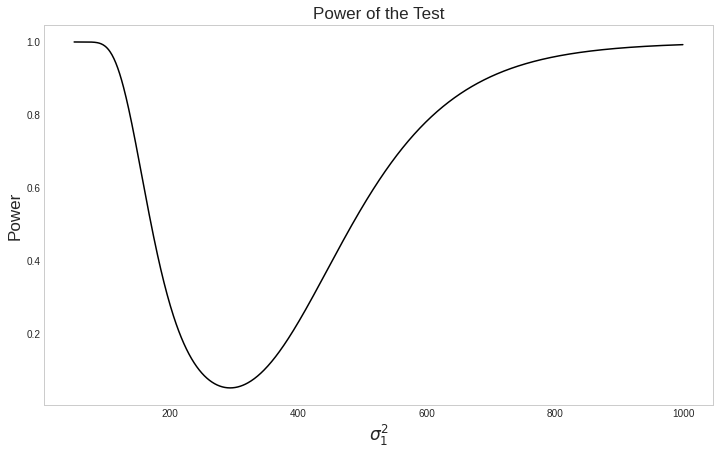

In [104]:
alpha = 0.05 #significance level
sigma2_0 = 300 #typical variance
n = 30 #sample size
df = n - 1 #degrees of freedom
values = [] #create an empty list to append the values of sigma2_1 and the corresponding power

#iterate over values of sigma2_1 ranging from 50 to 1000:
for sigma2_1 in range(50,1000):
    top_bound = chi2.ppf(1-alpha/2,df)*sigma2_0/sigma2_1 #compute the upper bound for chi2_{n-1}
    bottom_bound = chi2.ppf(alpha/2,df)*sigma2_0/sigma2_1 #compute the lower bound for chi2_{n-1}
    
    power = chi2.cdf(bottom_bound,df)+1-chi2.cdf(top_bound,df) #compute the power
    
    values.append([sigma2_1,power]) #append the values to the list
    
#generate graph:
x = [value[0] for value in values]
y = [value[1] for value in values]

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x, y, c='black')#, label='Degrees of freedom = %d' % df)
ax.set_xlabel('$\sigma_1^2$', fontsize=17)
ax.set_ylabel('Power', fontsize=17)
ax.set_title('Power of the Test', fontsize=17)
ax.grid(False)

plt.show()
    
    

##### Part e

Looking at the graph from $4d$, we can find the power for $\sigma_1^2=500$. If we use python:

The Power at 𝜎2_1 = 500 is: 0.549
Therefore, the probability of a Type II error is: 0.451


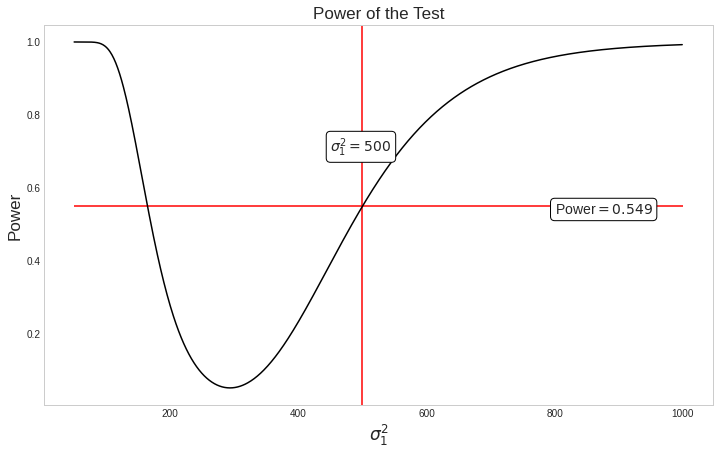

In [105]:
x_value = 500 #value of the variance
y_value = [value[1] for value in values if value[0] == x_value][0] #corresponding value of the power

print("The Power at 𝜎2_1 =",x_value,"is:",round(y_value,3))
print("Therefore, the probability of a Type II error is:",round(1-y_value,3))

#graph
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

plt.axvline(x=500, c='r')
plt.hlines(y_value, 50, 1000, colors='r')

ax.text(x_value-50, 0.7, '$\sigma^2_1=%.0f$' %x_value, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(800, y_value-0.02, 'Power$=%.3f$' %y_value, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.plot(x, y, c='black')#, label='Degrees of freedom = %d' % df)
ax.set_xlabel('$\sigma_1^2$', fontsize=17)
ax.set_ylabel('Power', fontsize=17)
ax.set_title('Power of the Test', fontsize=17)
ax.grid(False)

plt.show()

#### Question 10

The data below represent one-way commuting times (in minutes) for a simple random sample of $15$
people who work at a large assembly plant:

$$21.7, 26.8, 33.1, 27.9, 23.5, 39.0, 28.0, 24.7, 28.4, 28.9, 30.0, 33.6, 33.3, 34.1, 35.1$$

Assuming a normal distribution for the commuting times of those who work at the plant, a one sample upper-tail $t$-test (population mean exceeds $28$ minutes) at a $5\%$ level was performed. Was the null hypothesis rejected or not? What was the final conclusion?

#### Solution

Firstly, the null hypothesis $H_0$ is: the population mean does not exceed $28$ minutes, and the alternative hypothesis $H_1$ is then: the population mean exceeds $28$ minutes.

So:

$${H_0}:  \mu ≤ 28$$
$${H_1}:  \mu > 28$$

With:

$${\alpha} = 0.05$$

In [106]:
values = [21.7, 26.8, 33.1, 27.9, 23.5, 39.0, 28.0, 24.7, 28.4, 28.9, 30.0, 33.6, 33.3, 34.1, 35.1]
mean = np.mean(values)
std = np.std(values)
alpha = 0.05
mu = 28

print(round(mean, 2))
print(round(std, 2))

29.87
4.61


##### Using Test Statistics:

We will firstly look at the $t$-values respectively, to draw the conclusions from here:

$${T}=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$


In [107]:
T = round(((mean-mu)*(15)**0.5)/(std),3) #T is for the experimental
print(T)

1.574


Now we will obtain the value $t$ from the $t$-table, with $n-1$ ($15-1$) degrees of freedom, for which the area to its right its $\alpha$ (because is a one-sided tail):

In [108]:
T_th = round(t.ppf(1 - alpha, len(values)-1),3) #T_th is for the theoretical
print(T_th)

1.761


Now we can see if the value obtained is in the Acceptance Region or the Critical Region:

In [109]:
if T < T_th:
    print("We fail to reject Ho at a",alpha,"level of significance.")
else:
    print("We reject Ho.")

We fail to reject Ho at a 0.05 level of significance.


##### Conclusion:

In conclusion, we can see that, with a level of significance of $0.05$, the value obtained in the sample for the population mean (taking into account that the sample mean is a population mean estimate) falls into the Acceptance Region, so we fail to Reject the null hypothesis, and then, as a conclusion, we continue to believe $H_0$:

$$\mu < 28$$

To put it another way, about the mean for the commuting times, with the information we have, it cannot be said that, in average, they take any longer than $28$ minutes.

##### Using p-values:
We can also compute the $p$-value to confirm these results.

In [110]:
df = 15-1
p_value=1-t.cdf(T,df)
p_value = round(p_value, 4)
print(p_value)
if p_value > alpha:
    print("Indeed, by means of the p-value, we can confirm that we fail to reject Ho.")
else:
    print("We reject Ho.")

0.0689
Indeed, by means of the p-value, we can confirm that we fail to reject Ho.


##### Using Confidence Intervals:

We can also compute the Confidence Interval and recheck the result.
Since we are asked for the mean with normal population of unknown variance:

$$\mbox{CI}_{1-\alpha}(\mu) = \left(\bar{x}-t_{\alpha} \frac{s}{\sqrt{n}},+\infty\right)$$
where $t\sim t$-Student

In [111]:
lower = mean - T_th*std/(15**0.5)
lower = round(lower, 3)
upper = "+∞"

CI = (lower, upper) #since we had an upper bound, we now need to compute the lower confidence interval:
print("("+str(CI[0])+", "+str(CI[1])+")")

(27.778, +∞)


In [112]:
mu = 28
if mu >lower:
    print("The population mean of", mu,"minutes falls into the Confidence Interval, so we fail to reject Ho.")
else:
    print("The population mean of", mu,"minutes doesn´t fall into the Confidence Interval, so we reject Ho.")

The population mean of 28 minutes falls into the Confidence Interval, so we fail to reject Ho.


#### Question 13

A certain emergency automated response procedure to apply when manufacturing problems are
detected in a production line has been shown to have undesirable consequences in certain low probability cases. You wish to determine if the procedure should be modified due to these consequences, as it in general has worked quite well in the past. You have selected a quality measurement
as your reference for this decision. This quantity is assumed to follow a normal distribution with
variance equal to $1$. The reference value was measured on a sample of $n = 25$ emergencies, and
the sample mean was $15.4$. If the mean value for the process (in the absence of emergencies) is $15$,
answer the following questions:

a) Do we have sufficient evidence to conclude that this procedure increases the mean value of the
indicator, at an $\alpha = 0.05$ level?

b) The sample quasi-standard deviation for the 25 observations was 1.2. Does this imply that
the population variance has increased? Conduct this test for a significance level of 10%.

c) Would you reach the same conclusions for the preceding tests if they were conducted at a 1%
significance level?

#### Solution

##### Part a
Let $X$ represent the quality measurement. Since the population is normal, with variance known (of $1$) and the sample is large enough ($n=25$), we know that the mean of each the samples will follow a normal distribution with mean the one of the population ($15$) and standard deviation the one of the population over the squared root of the sample size:

$${\overline X} \sim {N(\mu, {\sigma}/{\sqrt{n}})}$$

So we need to specify the hypothesis:

$$Ho: \mu \leqslant \mu_0 = 15$$
$$H1: \mu \gt \mu_0 = 15$$

##### Using Test Statistics:

We obtain the $z$ value from the experiment ($z$), and then compare it to the theoretical ($z_0$) one for alpha (because is an upper tail):

$${Z}=\frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$$

In [113]:
#Firstly, we will standarize the test statistic (z):
z = (15.4-15)/(1/(25**0.5))
alpha = 0.05

#we obtain the value of z0 with a significance level of 0.05 from the table, or, in this case, from python:
z0 = norm.ppf(1 - alpha,0,1)

#Now we simply compare, taking into account that if z > z0, then it will be in the Rejection Region:
if z > z0:
    print("We have sufficient evidence to reject Ho.")
else:
    print("We fail to reject Ho with the evidence given.")

We have sufficient evidence to reject Ho.


#### Using p-values:
We can also compute the p-value, and then compare it with the one of the significance level.

In [114]:
p_value = round(1-norm.cdf(z, 0, 1),4)

print(p_value)
if round(p_value, 4) >= alpha:
    print("We fail to reject Ho.")
else:
    print("We reject Ho.")

0.0228
We reject Ho.


##### Using Confidence Intervals:
Finally, we can compute the Confidence Interval, taking into account that this is an upper tail test.

$$\mbox{CI}_{1-\alpha}(\mu) = \left(\bar{x}-z_{\alpha} \frac{\sigma}{\sqrt{n}},+\infty\right)$$
where $z\sim $N(0,1)

In [115]:
std = 1
n = 25

lower = 15.4 - z0*std/(n**0.5)
lower = round(lower, 4)
upper = "+∞"

CI = (lower, upper)
print("("+str(CI[0])+", "+str(CI[1])+")")

(15.071, +∞)


In [116]:
mu = 15
if  mu > lower:
    print("We fail to reject Ho.")
else:
    print("Indeed, we can see yet again that we reject Ho.")

Indeed, we can see yet again that we reject Ho.


##### Part b
Let´s define the hypothesis:

$${Ho}:σ^2\leqslant σ_0^2 = 1$$ 
$${H1}:σ^2\gt σ_0^2 = 1$$

##### Using Test Statistics:

The test statistic is:
$$\frac{(n-1)s^2}{\sigma_0^2} \sim \chi^2_{n-1}$$

We will denote it by $x$, for simplicity.

In [117]:
#so we compute the test statistic, that we will call x:
s = 1.2
s0 = 1
alpha = 0.1
n = 25
df = 25-1
x = (n-1)*(s**2)/(s0**2)
print("The test statistic is:",x)

#we obtain its respective value from the chi-square distribution:
x0 = chi2.ppf(1-alpha,df)
print("The bound for RR𝛼 is:",round(x0,4))

The test statistic is: 34.56
The bound for RR𝛼 is: 33.1962


In [118]:
if x > x0:
    print("We reject Ho, since we have enough evidence that the variance has increased.")
else:
    print("We fail to reject Ho.")

We reject Ho, since we have enough evidence that the variance has increased.


##### Using p-values:
If we look at the p-value:

In [119]:
p_value = 1-chi2.cdf(x, df)
p_value = round(p_value, 4)
print(p_value)

0.0752


In [120]:
if p_value < alpha:
    print("We reject Ho.")
else:
    print("We fail to reject Ho.")

We reject Ho.


##### Using Condifence Intervals
We can also compute the Confidence Interval, taking into account that we are now dealing with a chi-square distribution of 24 degrees of freedom.

$$\mbox{CI}_{1-\alpha}(\sigma^2_X) = \left(\frac{(n-1)s_x^2}{\chi^2_{n-1;\alpha}},+\infty\right)$$

In [121]:
lower = ((n-1)*s**2)/(chi2.ppf(1-alpha,df))
lower = round(lower, 4)
upper = "+∞"

CI = (lower, upper)
print("("+str(CI[0])+", "+str(CI[1])+")")

(1.0411, +∞)


In [122]:
if s0 > lower:
    print("We fail to reject Ho.")
else:
    print("We reject Ho.")

We reject Ho.


##### Part c
We can just repeat the procedure for each part, only changing the significance level:

##### a)

##### Using Test Statistics:

In [123]:
#Firstly, we will standarize the test statistic (z):
z = (15.4-15)/(1/(25**0.5))
alpha = 0.01

#we obtain the value of z0 with a significance level of 0.05 from the table, or, in this case, from python:
z0 = norm.ppf(1 - alpha,0,1)

#Now we simply compare, taking into account that if z > z0, then it will be in the Rejection Region:
if z > z0:
    print("We have sufficient evidence to reject Ho.")
else:
    print("We fail to reject Ho with the evidence given.")

We fail to reject Ho with the evidence given.


##### Using p-values:
We can also compute the p-value, and then compare it with the one of the significance level.

In [124]:
p_value = 1-norm.cdf(z, 0, 1)
p_value = round(p_value, 4)

print(p_value)
if round(p_value, 4) >= alpha:
    print("We fail to reject Ho.")
else:
    print("We reject Ho.")

0.0228
We fail to reject Ho.


##### Using Confidence Intervals:
Finally, we can compute the Confidence Interval, taking into account that this is an upper tail test.

$$\mbox{CI}_{1-\alpha}(\mu) = \left(\bar{x}-z_{\alpha} \frac{\sigma}{\sqrt{n}},+\infty\right)$$
where $z\sim $N(0,1)

In [125]:
std = 1
n = 25

lower = 15.4 - z0*std/(n**0.5)
lower = round(lower, 3)
upper = "+∞"

CI = (lower, upper)
print("("+str(CI[0])+", "+str(CI[1])+")")

(14.935, +∞)


In [126]:
mu = 15
if  mu > lower:
    print("We fail to reject Ho.")
else:
    print("Indeed, we can see yet again that we reject Ho.")

We fail to reject Ho.


##### b)

Let´s define the hypothesis:

$${Ho}:σ^2\leqslant σ_0^2 = 1$$ 
$${H1}:σ^2\gt σ_0^2 = 1$$

##### Using Test Statistics:
The test statistic is:
$$\frac{(n-1)s^2}{\sigma_0^2} \sim \chi^2_{n-1}$$

We will denote it by x, for simplicity.

In [127]:
#so we compute the test statistic, that we will call x:
s = 1.2
s0 = 1
alpha = 0.01
n = 25
df = 25-1
x = (n-1)*(s**2)/(s0**2)
print(x)

#we obtain its respective value from the chi-square distribution:
x0 = chi2.ppf(1-alpha,df)
print(round(x0,4))

34.56
42.9798


In [128]:
if x > x0:
    print("We reject Ho, since we have enough evidence that the variance has increased.")
else:
    print("We fail to reject Ho.")

We fail to reject Ho.


##### Using p-values:
If we look at the p-value:

In [129]:
p_value = round(1-chi2.cdf(x, df),4)
print(p_value)

0.0752


In [130]:
if p_value < alpha:
    print("We reject Ho.")
else:
    print("We fail to reject Ho.")

We fail to reject Ho.


##### Using Conidence Intervals:
We can also compute the Confidence Interval, taking into account that we are now dealing with a chi-square distribution of 24 degrees of freedom.

$$\mbox{CI}_{1-\alpha}(\sigma^2_X) = \left(\frac{(n-1)s_x^2}{\chi^2_{n-1;\alpha}},+\infty\right)$$

In [131]:
lower = ((n-1)*s**2)/(chi2.ppf(1-alpha,df))
lower = round(lower, 4)
upper = "+∞"

CI = (lower, upper)
print("("+str(CI[0])+", "+str(CI[1])+")")

(0.8041, +∞)


In [132]:
if s0 > lower:
    print("We fail to reject Ho.")
else:
    print("We reject Ho.")

We fail to reject Ho.
